# Slack Overflow Survey Data Analysis #


# 1. Understanding Business Objective: #

The goal of this analysis will be to investigate which languages and other tech tools are used more commonly among developers.


# 2.  Understanding the Data: #

The data presents 98855 developer survey results with 129 attributes. These range from demographics to lifestyle to skillset to top tools used in 2018. We want to predict the most popular languages used in 2019, so we will also look into datasets from 2011-2019.



# 3. Preparation of Data: #

We will begin by looking at the data form 2018 to get a deeper sense of the developer survey data. 


In [80]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

<IPython.core.display.Javascript object>

In [83]:
df = pd.read_csv("StackOverflow_Datasets/Copy of survey_results_public.csv")

C:\Users\AnxhelaCoba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>

In [4]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


<IPython.core.display.Javascript object>

## We will look at a subset of the data that reflect participants currently employed full-time ##

In [5]:
# Since a few important features we want to eventually use for our model have values in the format of lists we want to change that so each row has an individual value.
# This way we can see the most common language and not most common languages. The following function will do this.

<IPython.core.display.Javascript object>

In [6]:
def split_column_value(df, column, separator=";"):

    df = pd.DataFrame(df[column].dropna().str.split(separator).tolist()).stack()
    return df

<IPython.core.display.Javascript object>

In [7]:
# We want to visualize the data so I went ahead and made a function we can call easily to look at the top 10 value counts sorted for various attributes:

<IPython.core.display.Javascript object>

In [8]:
def make_graph(df, column):

    plt.figure(figsize=[15, 10])
    plt.xlabel("Number of Participants".title(), fontsize=20, weight="bold")
    plt.ylabel(column.title(), fontsize=20, weight="bold")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20, rotation=90)
    plt.style.use("ggplot")
    ax = (
        split_column_value(df, column)
        .value_counts()
        .sort_values(ascending=False)[:10]
        .plot("barh")
    )

    total = len(df[column])
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

    plt.show()

<IPython.core.display.Javascript object>

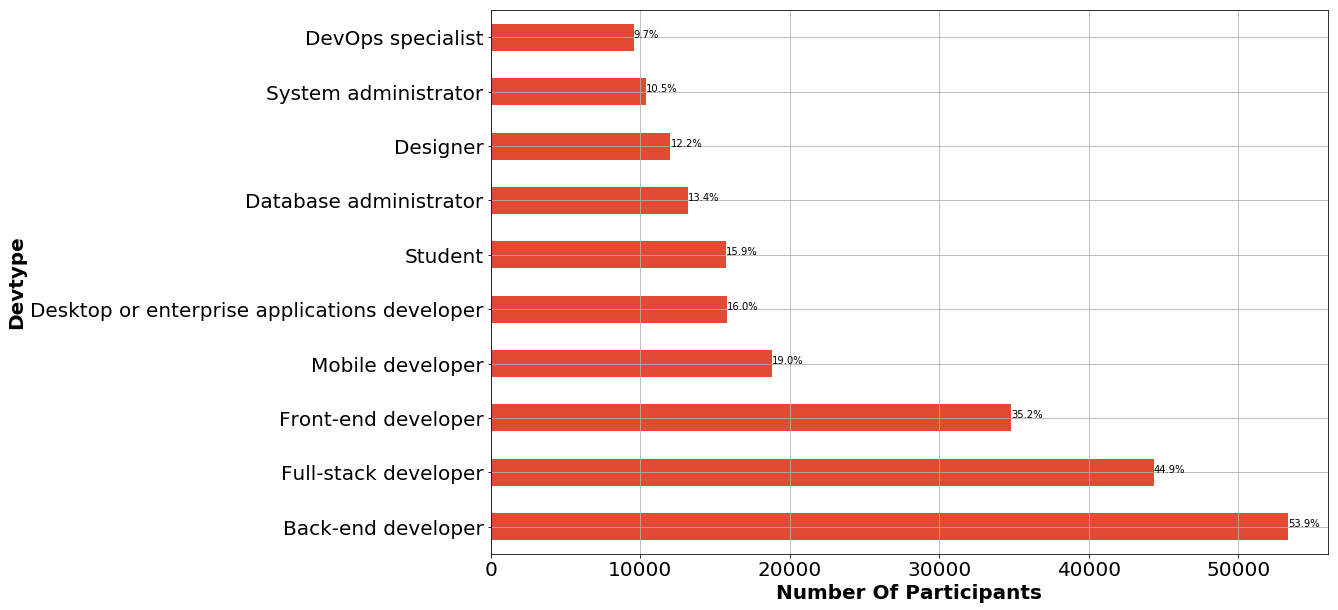

<IPython.core.display.Javascript object>

In [9]:
make_graph(df, "DevType")

In [10]:
# Looking at graph above we can see that the number of developers do mainly back-end development.

<IPython.core.display.Javascript object>

In [11]:
col_names = df.columns.tolist()
col_names

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

<IPython.core.display.Javascript object>

# Most popular technologies and tools used by Developers in 2018 #
We will take a look at the most commonly used tools in tech visually below.

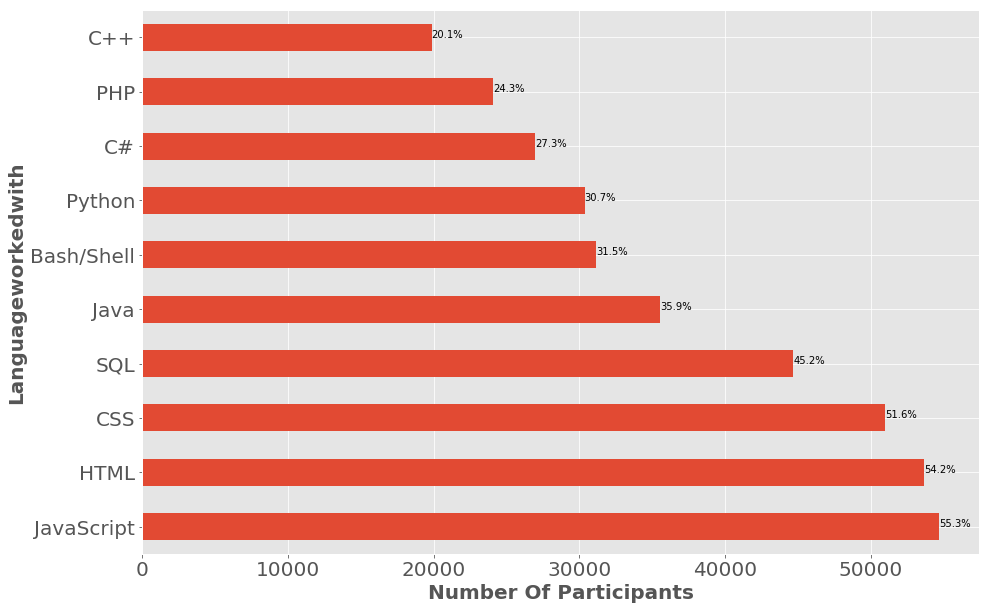

<IPython.core.display.Javascript object>

In [12]:
make_graph(df, "LanguageWorkedWith")

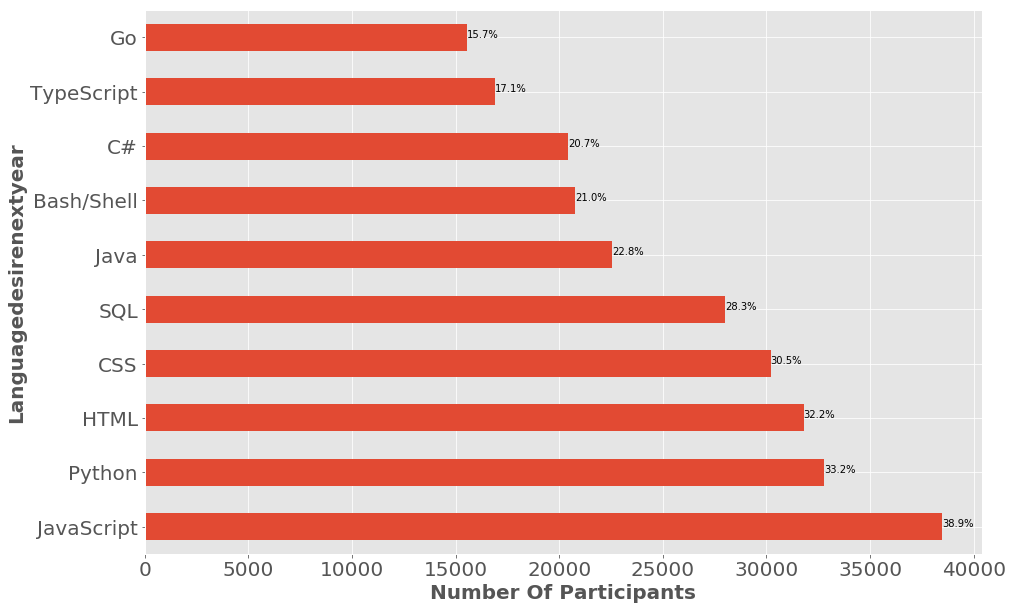

<IPython.core.display.Javascript object>

In [13]:
make_graph(df, "LanguageDesireNextYear")

Looking at the top languages used in 2018 we see that the most popular language is JavaScript followed by html, css and then sql, bash/shell and python.  


Looking at Stack Overflow's 2019 data results: Most popular language in 2019 was JavaScript, HTML and CSS. What differed in 2019 is that Python was voted as more popular than java and the bash//shell.



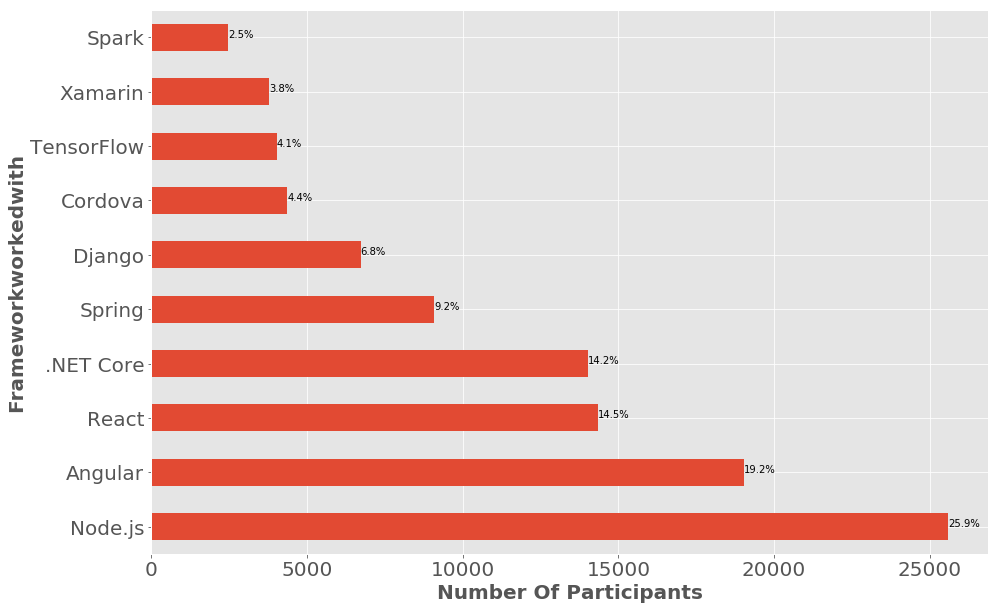

<IPython.core.display.Javascript object>

In [14]:
make_graph(df, "FrameworkWorkedWith")

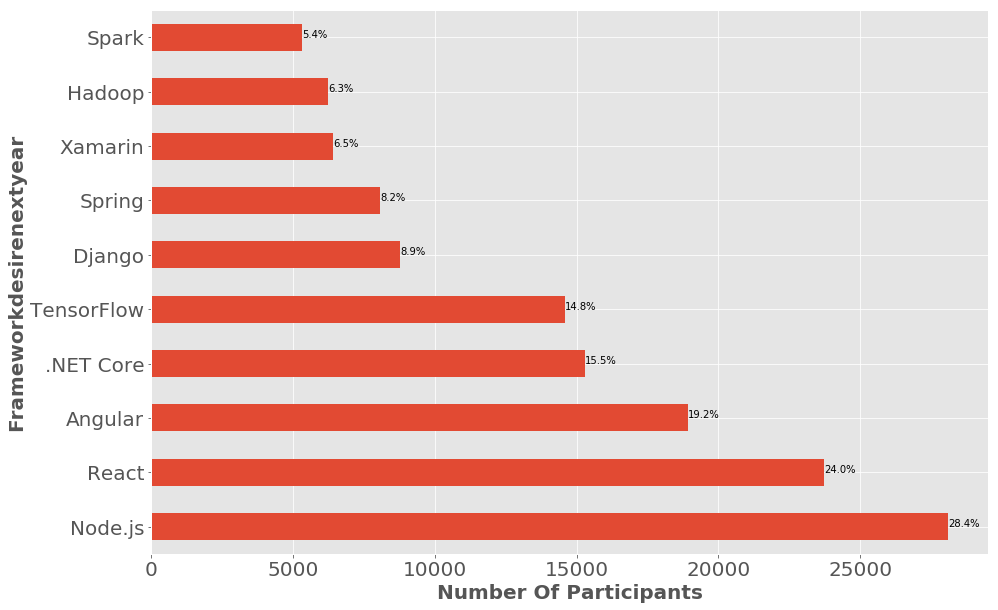

<IPython.core.display.Javascript object>

In [15]:
make_graph(df, "FrameworkDesireNextYear")

2018: Node.js was most popular framework, and Angular is the most popular web framework

2019: Node.js still most popular but jQuery is far more common web framework in 2019

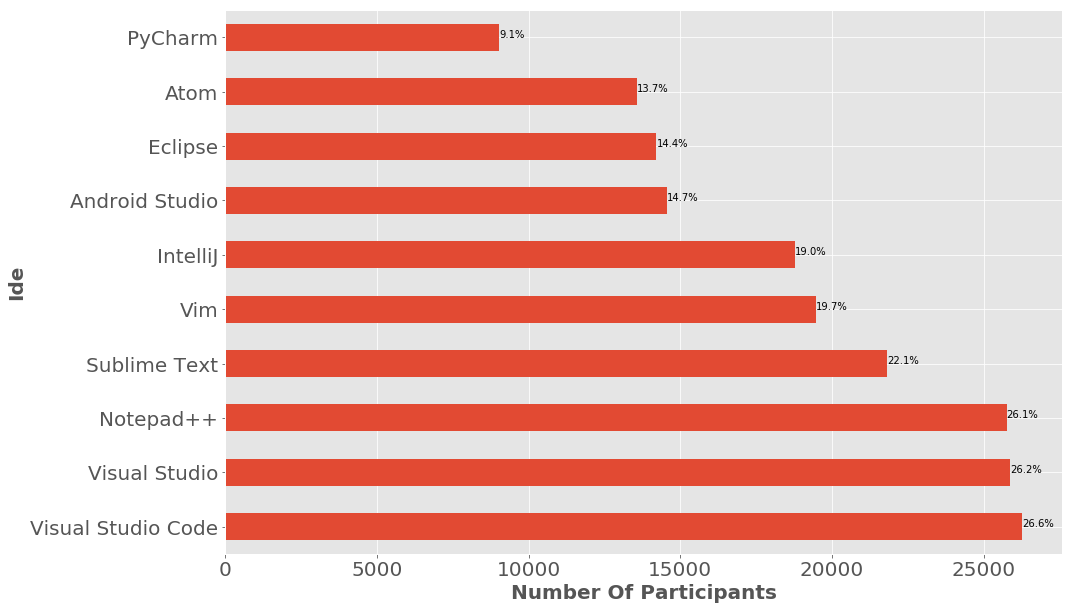

<IPython.core.display.Javascript object>

In [16]:
make_graph(df, "IDE")

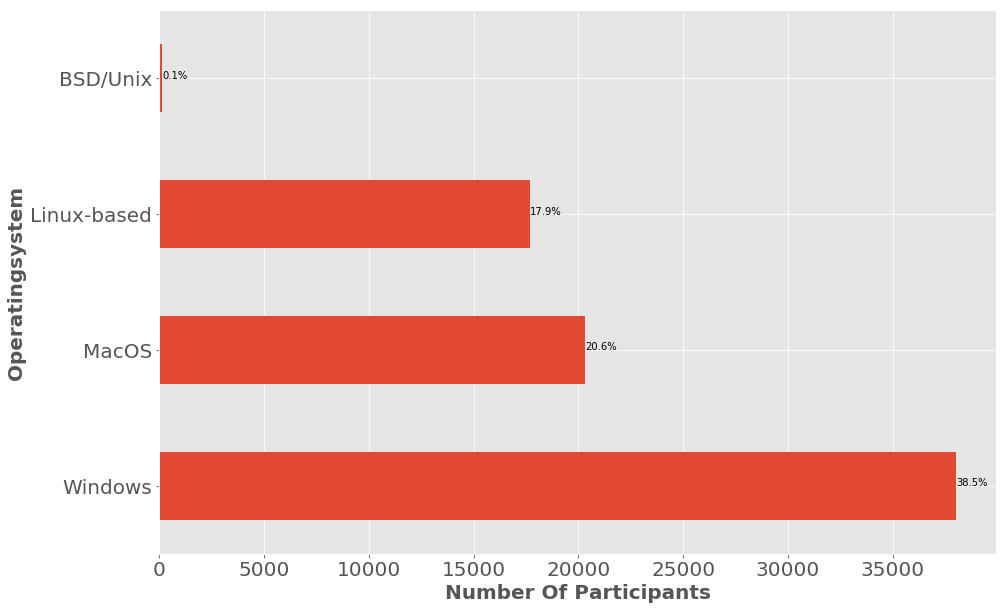

<IPython.core.display.Javascript object>

In [17]:
make_graph(df, "OperatingSystem")

 VSC best from 2018 and stays best for 2019 as well.


# Participants Demographics # 

In this section we will look at the participant demographics for 2018. 

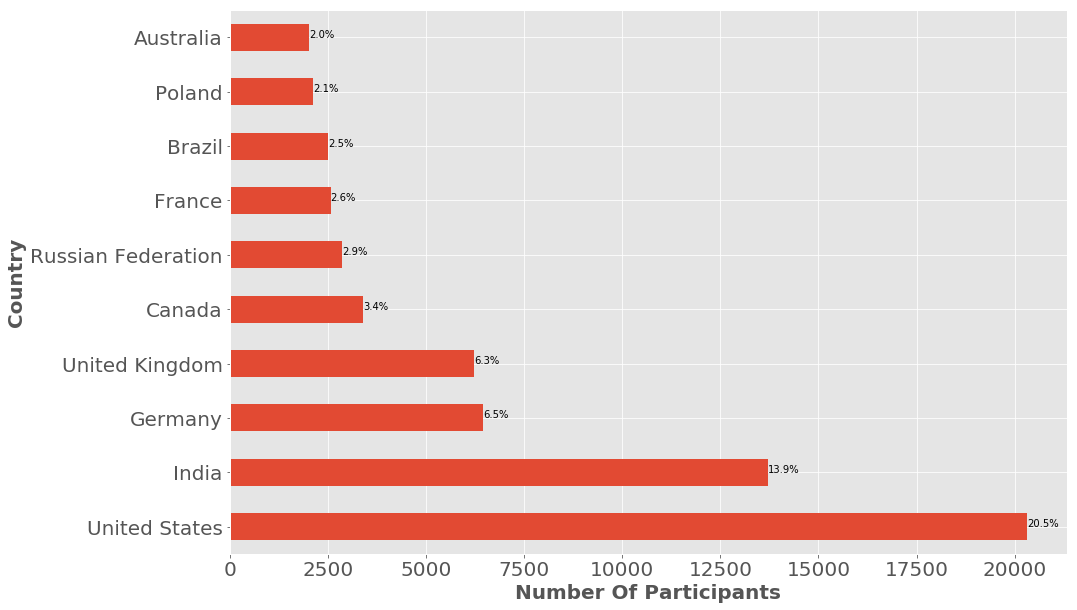

<IPython.core.display.Javascript object>

In [18]:
make_graph(df, "Country")

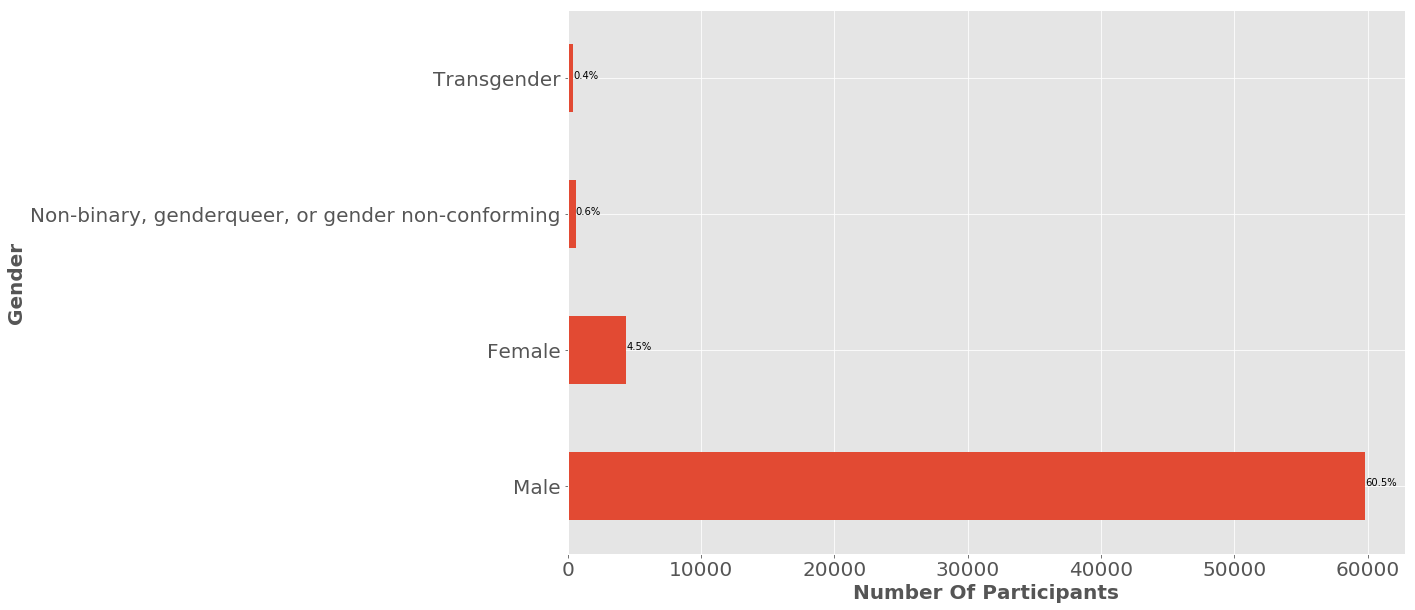

<IPython.core.display.Javascript object>

In [19]:
make_graph(df, "Gender")

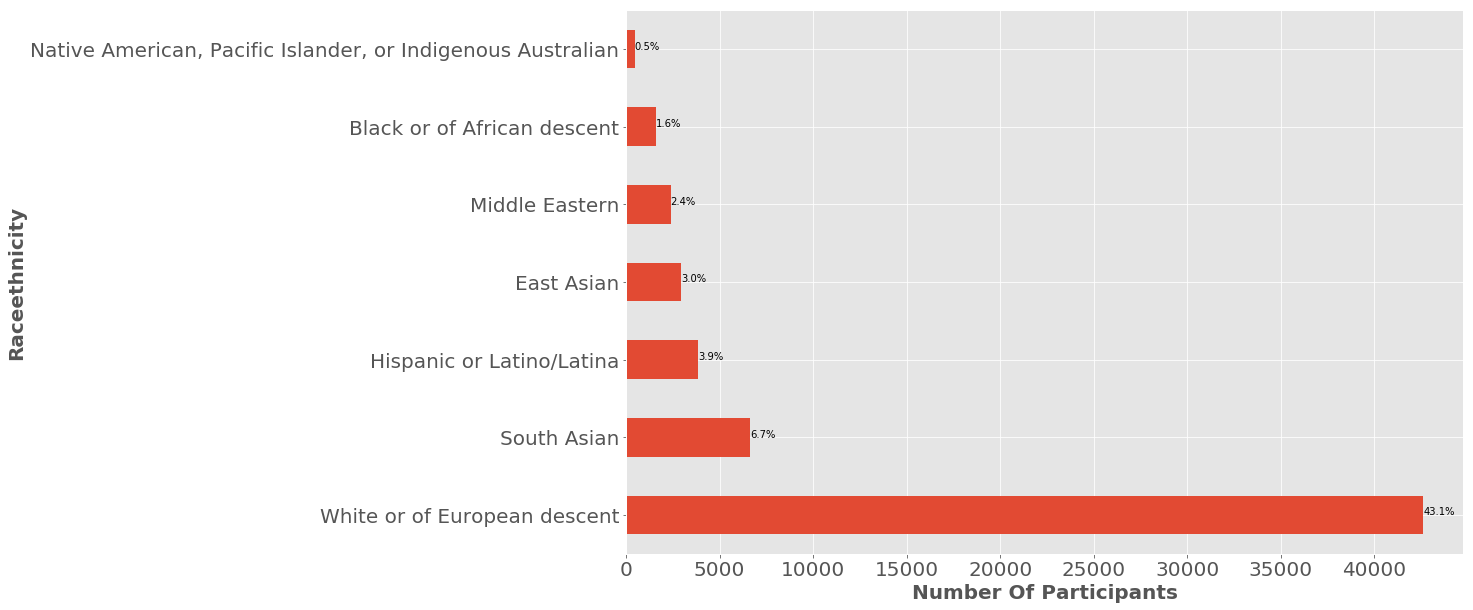

<IPython.core.display.Javascript object>

In [20]:
make_graph(df, "RaceEthnicity")

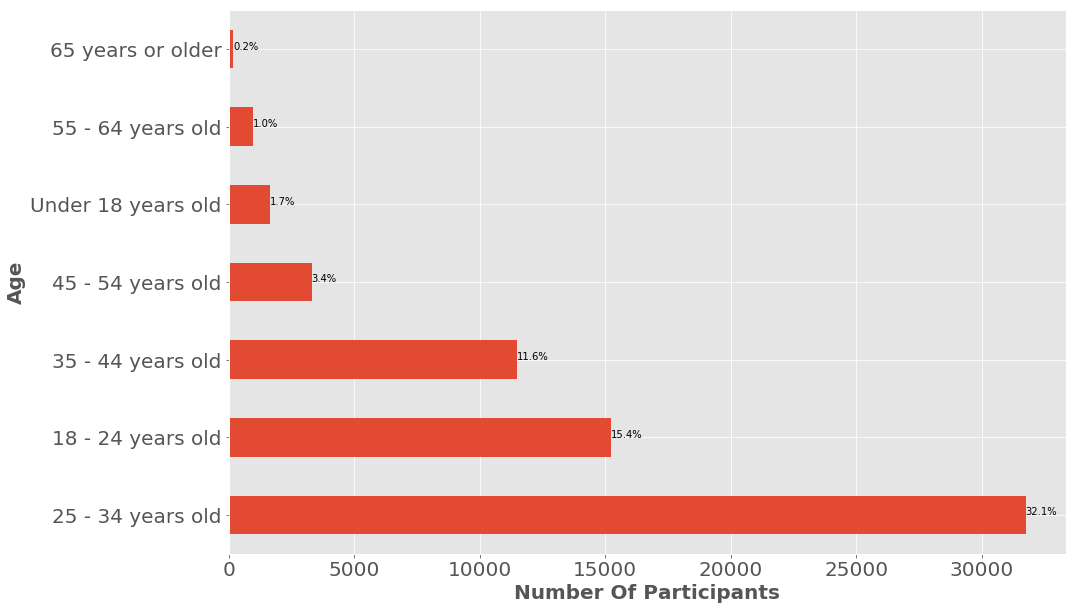

<IPython.core.display.Javascript object>

In [21]:
make_graph(df, "Age")

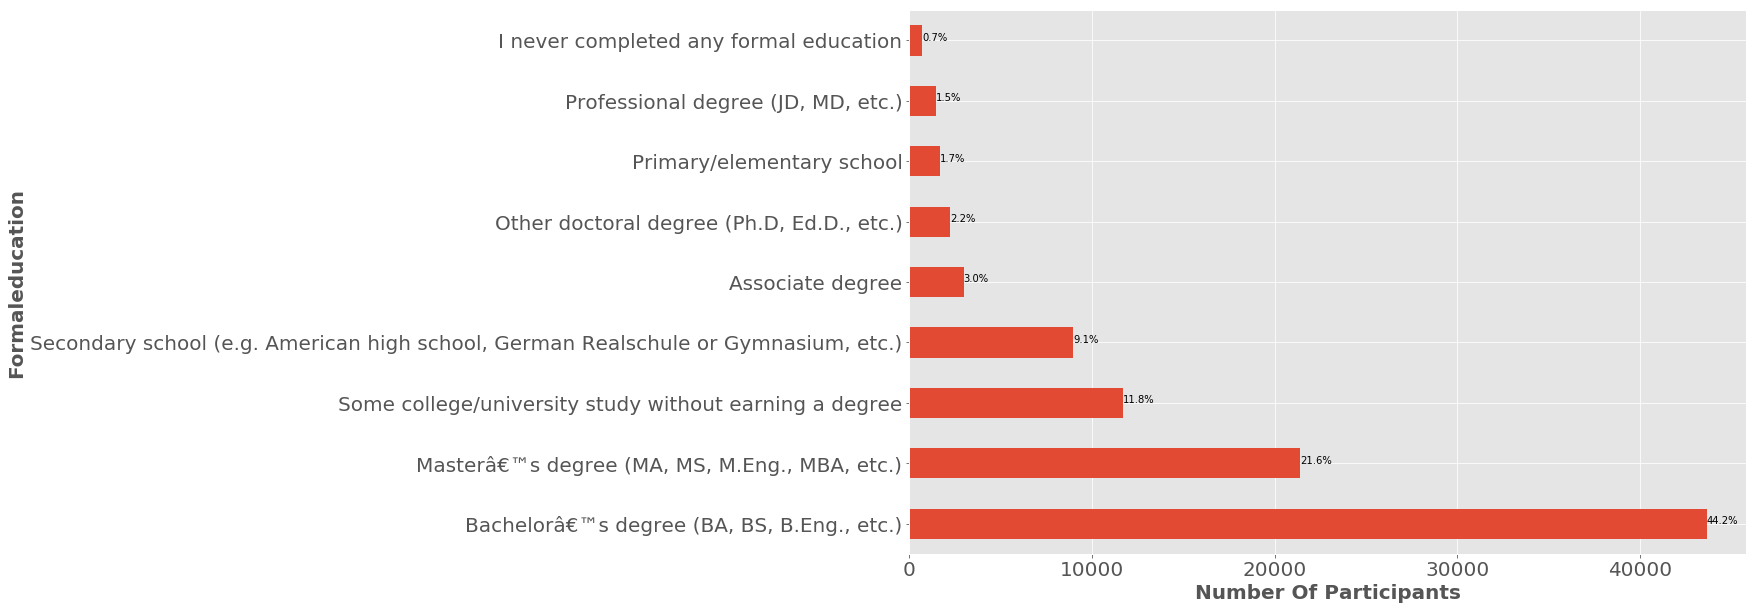

<IPython.core.display.Javascript object>

In [22]:
make_graph(df, "FormalEducation")

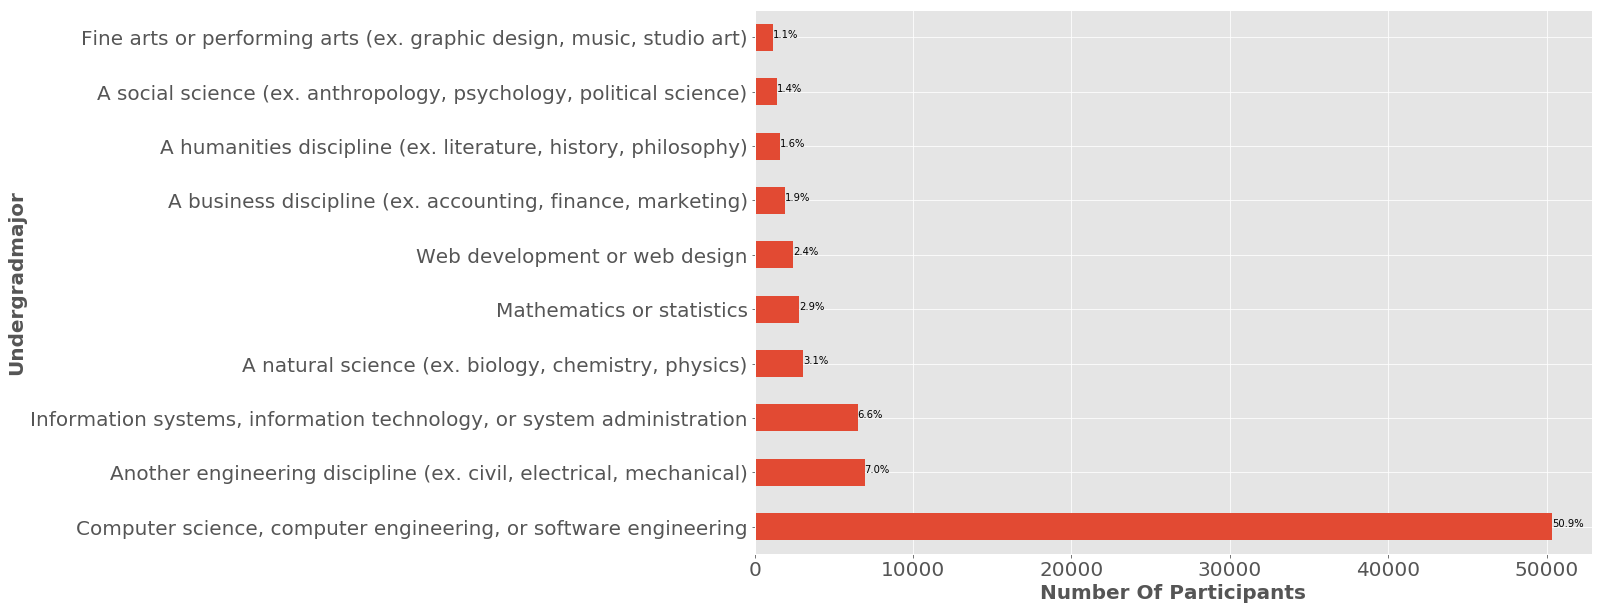

<IPython.core.display.Javascript object>

In [23]:
make_graph(df, "UndergradMajor")

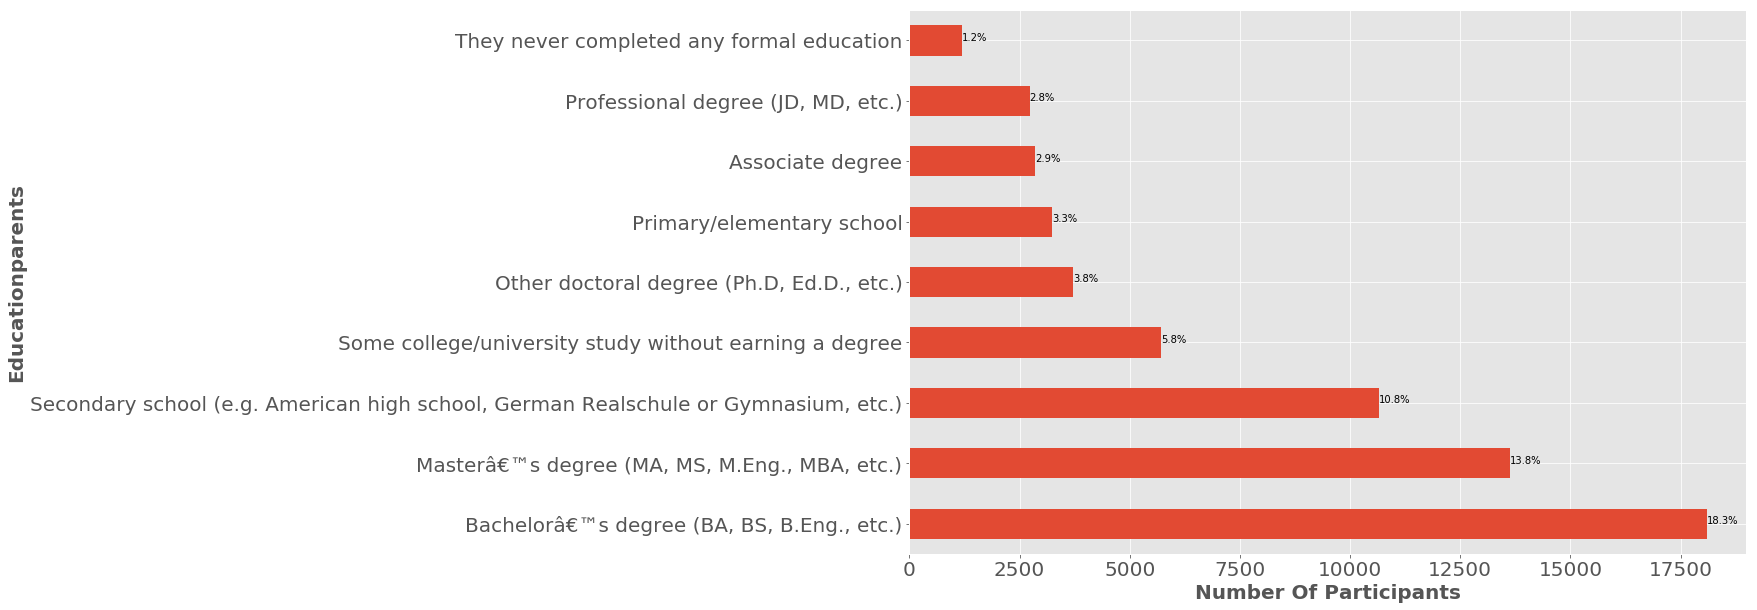

<IPython.core.display.Javascript object>

In [24]:
make_graph(df, "EducationParents")

We see below that most of the participants are male, white and 25-34 years old whom hold a Bachelor's degree in either CS, CE or SE. Most demographics have yet to shift in 2019. 

# Hours Spent on Computer#

Here we will look at how many hours are spent on the computer and how that effects other attributes like wake up time, time spent outside and exercise.

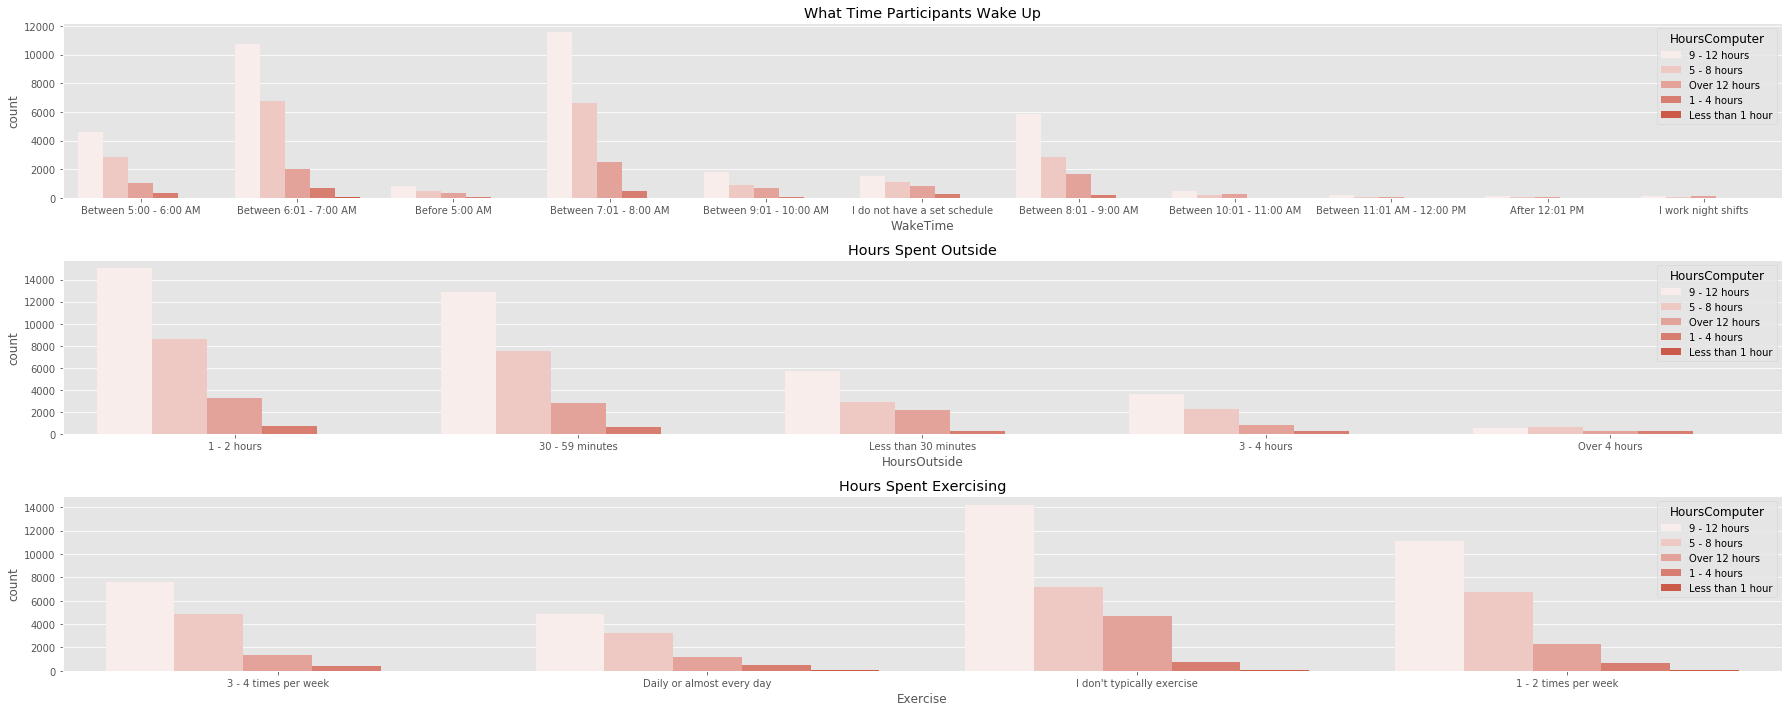

<IPython.core.display.Javascript object>

In [25]:
fig, ax = plt.subplots(nrows=3, figsize=[25, 10])

default_color = sb.color_palette()[0]
sb.countplot(data=df, x="WakeTime", hue="HoursComputer", color=default_color, ax=ax[0])
sb.countplot(
    data=df, x="HoursOutside", hue="HoursComputer", color=default_color, ax=ax[1]
)
sb.countplot(data=df, x="Exercise", hue="HoursComputer", color=default_color, ax=ax[2])

ax[0].title.set_text("What Time Participants Wake Up")
ax[1].title.set_text("Hours Spent Outside")
ax[2].title.set_text("Hours Spent Exercising")

plt.tight_layout()
plt.show()

Above we see that most developers that spend most time on computer wake up between 7AM-8AM. We also see that more time spent on computer does not neccesarily indicate less time spent outside. We see that most developers spent about 1-2 hours a day outside. Even developers spending more than 12 hours will find time to spend outside. However, we see most developers working about 9-12 hours do not typically exercise. 

### Looking at Salary and how that plays a role for lifestyle #

In [26]:
df["ConvertedSalary"].dtype

dtype('float64')

<IPython.core.display.Javascript object>

In [27]:
df["ConvertedSalary"].unique()

array([    nan,  70841.,  21426., ...,  11244., 269076.,   1584.])

<IPython.core.display.Javascript object>

In [28]:
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [29]:
df["ConvertedSalary"] = df["ConvertedSalary"].astype(np.int64)

<IPython.core.display.Javascript object>

# Summary on Hobby Developers and Hours Spent on Computer #
Below, we see a few interesting things. We see that most developers that spend more time on the computer (9-12 hours) typically get paid more than those that do no spend as much time (5-8). We also see that developers under that category also claim to code as a hobby. 

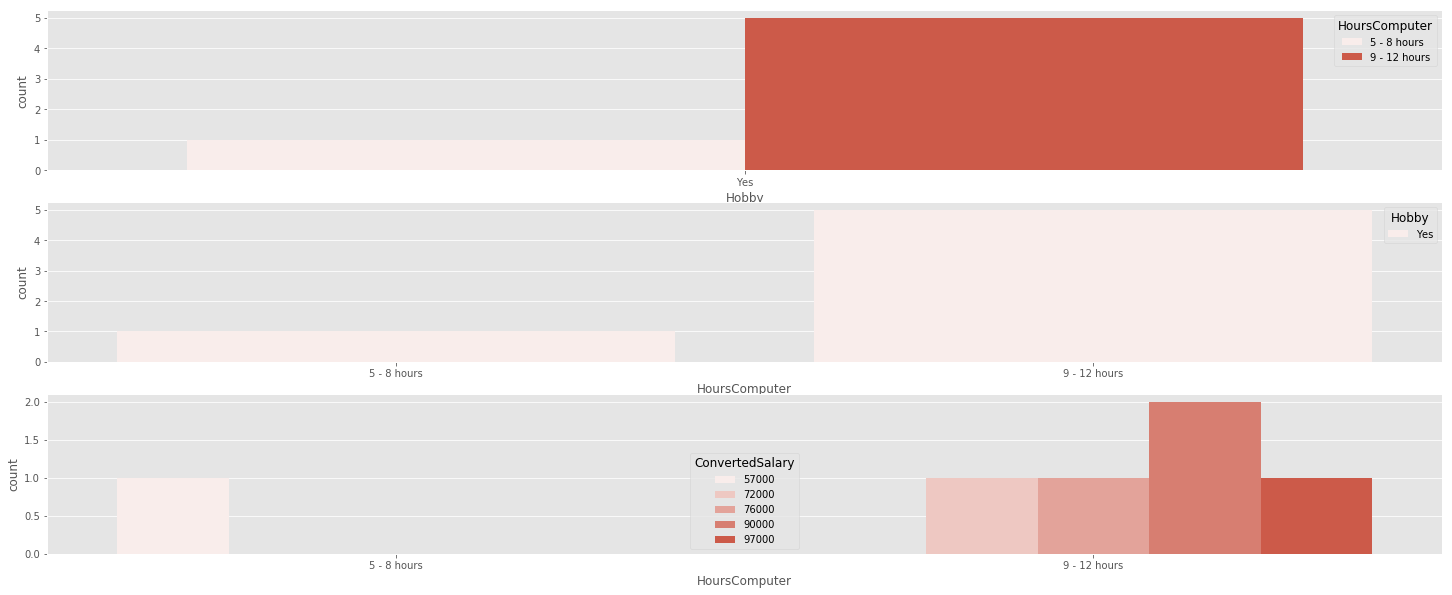

<IPython.core.display.Javascript object>

In [30]:
fig, ax = plt.subplots(nrows=3, figsize=[25, 10])

default_color = sb.color_palette()[0]


sb.countplot(data=df, x="Hobby", hue="HoursComputer", color=default_color, ax=ax[0])
sb.countplot(data=df, x="HoursComputer", hue="Hobby", color=default_color, ax=ax[1])

sb.countplot(
    data=df, x="HoursComputer", hue="ConvertedSalary", color=default_color, ax=ax[2]
)

# AI Analysis #

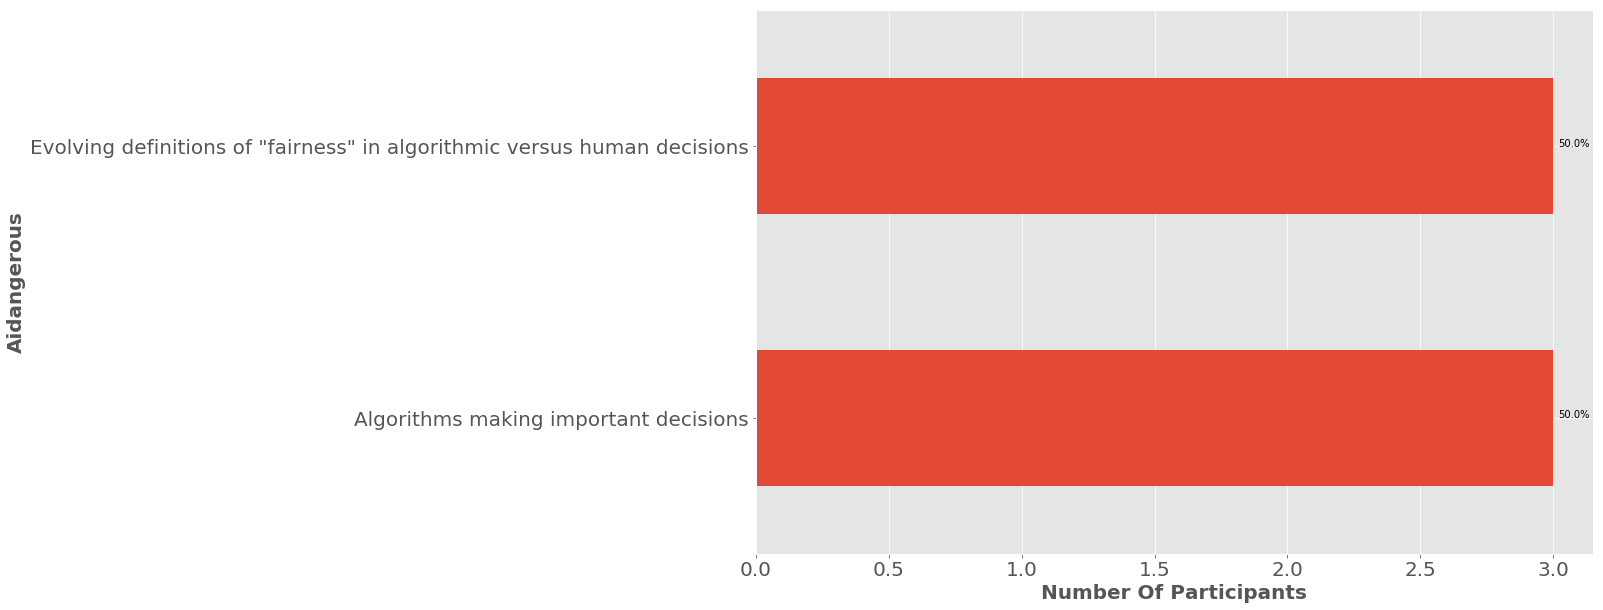

<IPython.core.display.Javascript object>

In [31]:
make_graph(df, "AIDangerous")

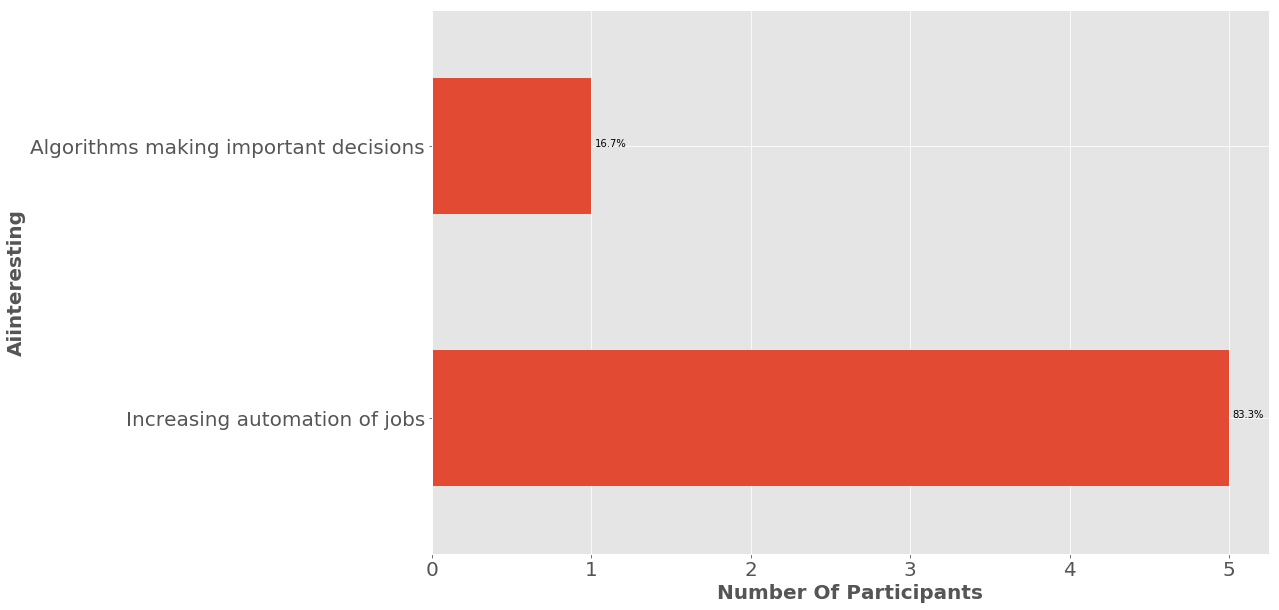

<IPython.core.display.Javascript object>

In [32]:
make_graph(df, "AIInteresting")

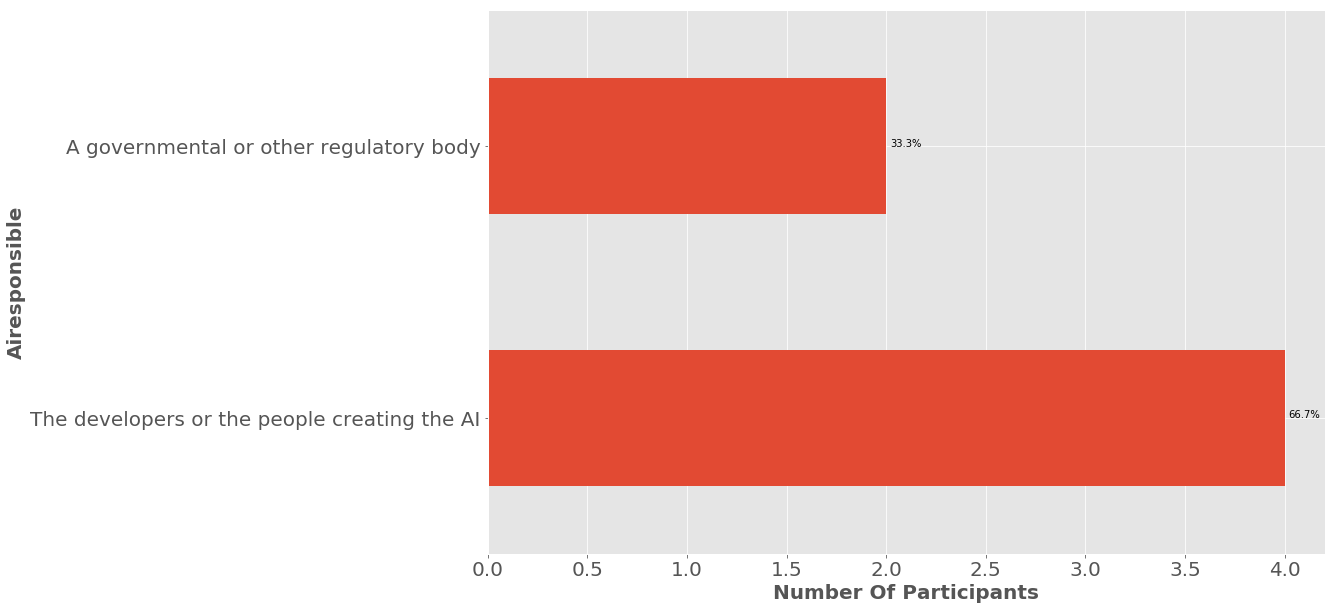

<IPython.core.display.Javascript object>

In [33]:
make_graph(df, "AIResponsible")

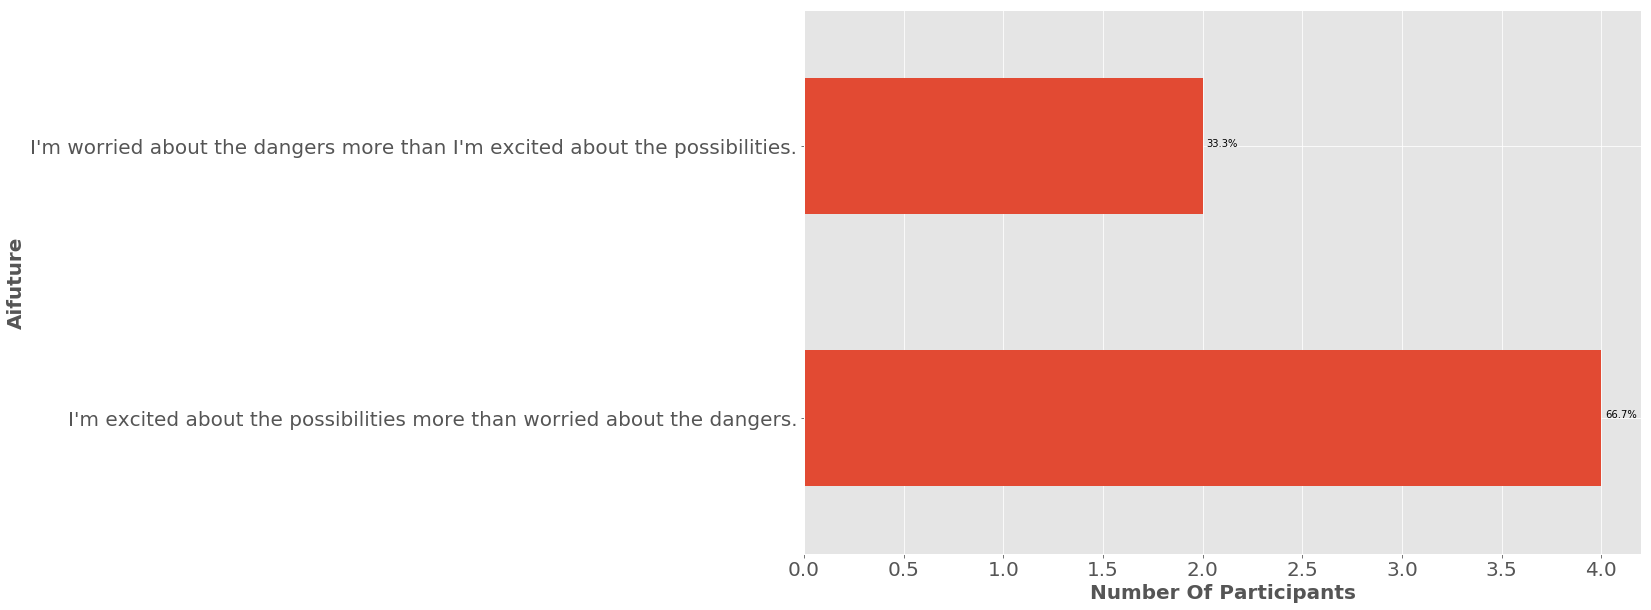

<IPython.core.display.Javascript object>

In [34]:
make_graph(df, "AIFuture")

# Summary of AI: #
It seems that most developers believe the most dangerous aspect of AI is that ultimately Algorithms will make important decisions. That could end in dangerous consequences. Most interesting thing about AI to developers in this survey is the increase of automation in jobs. When it comes to responsibility, most developers agree that the developer or people creating the AI should be responsible for it, rather than the government or prominent industry leaders. Optimistically, most developers are more excited than worried about the dangers of AI. 

# Ethics #

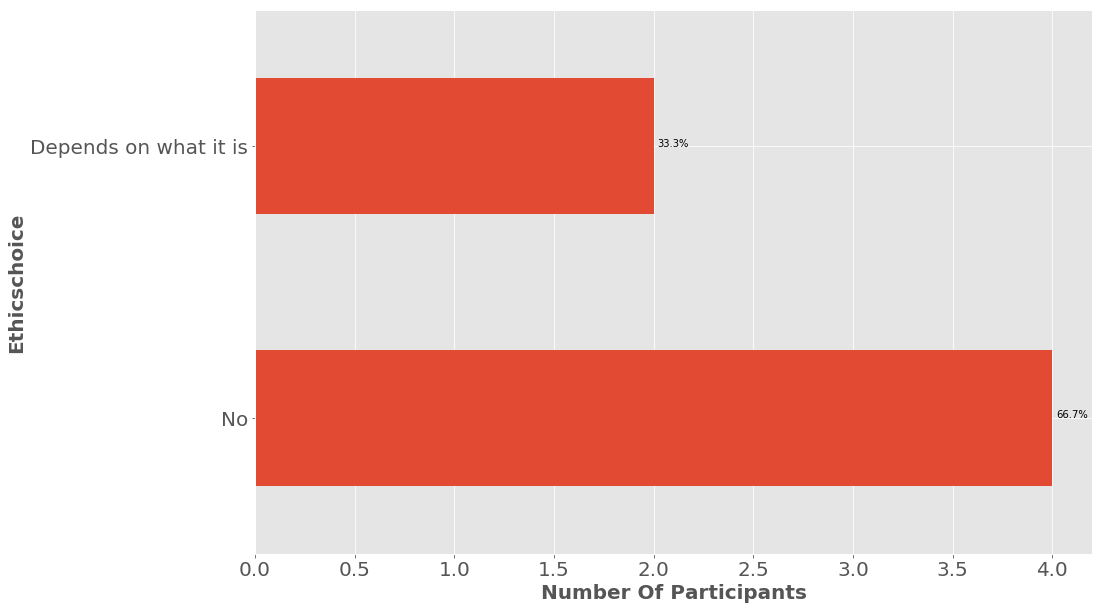

<IPython.core.display.Javascript object>

In [35]:
make_graph(df, "EthicsChoice")

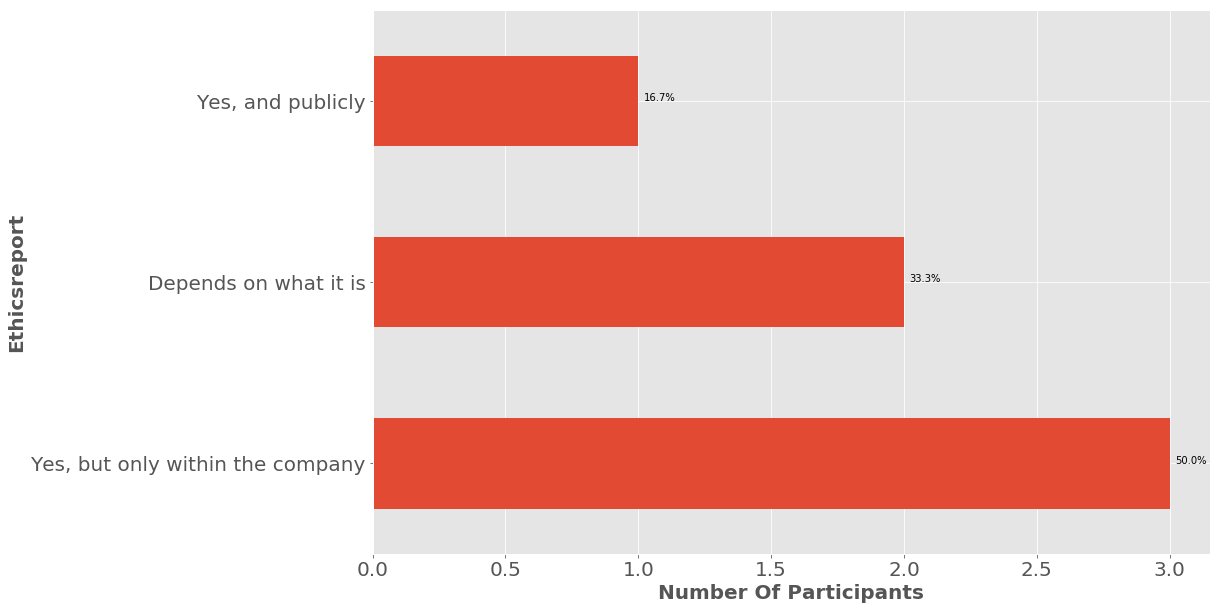

<IPython.core.display.Javascript object>

In [36]:
make_graph(df, "EthicsReport")

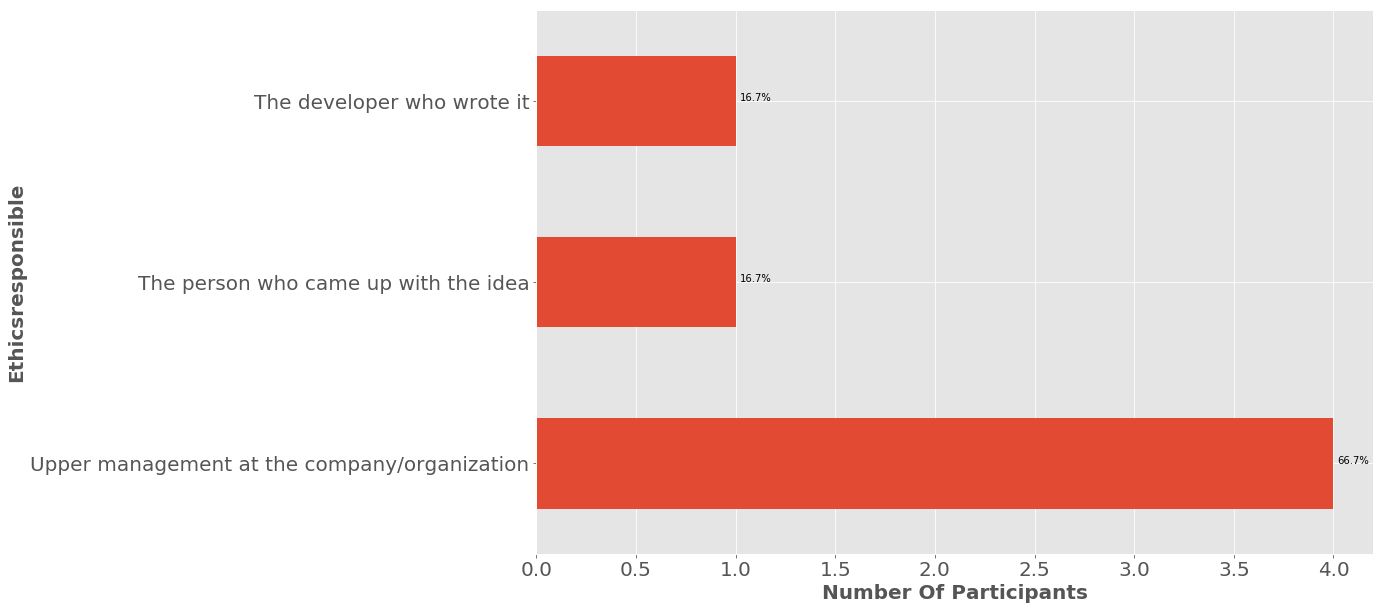

<IPython.core.display.Javascript object>

In [37]:
make_graph(df, "EthicsResponsible")

# Summary for Ethics: #

Most developers would not write code for an unethical purpose. However, most developers would report unethical code only depending on what it was. Also most developers believe it is not up to developers to deal with unethical causes from code they write, but rather upper management. 

# Career satisfaction survey outcomes #

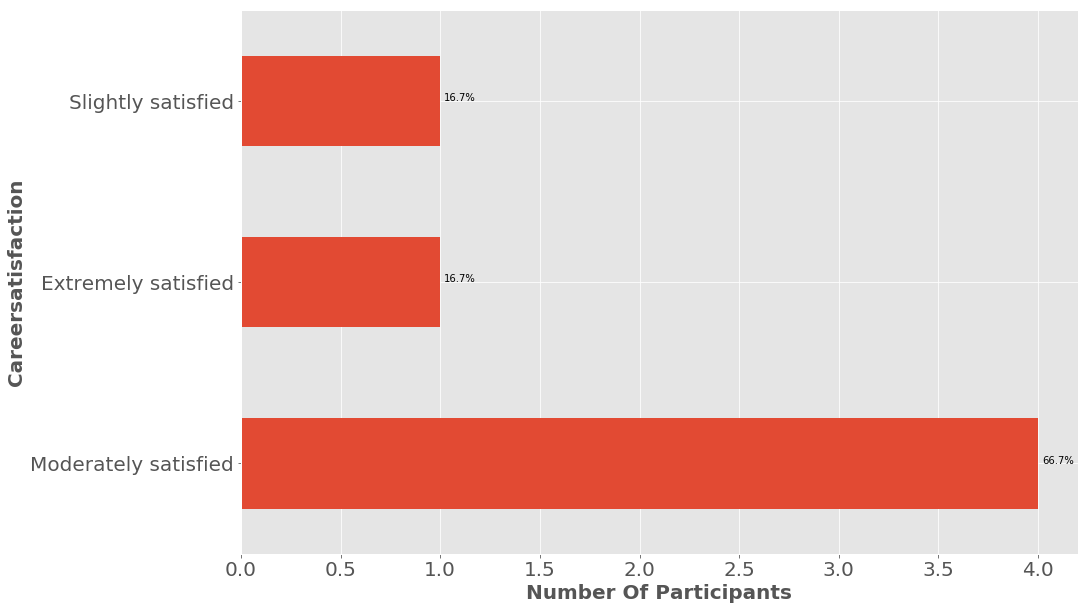

<IPython.core.display.Javascript object>

In [38]:
make_graph(df, "CareerSatisfaction")

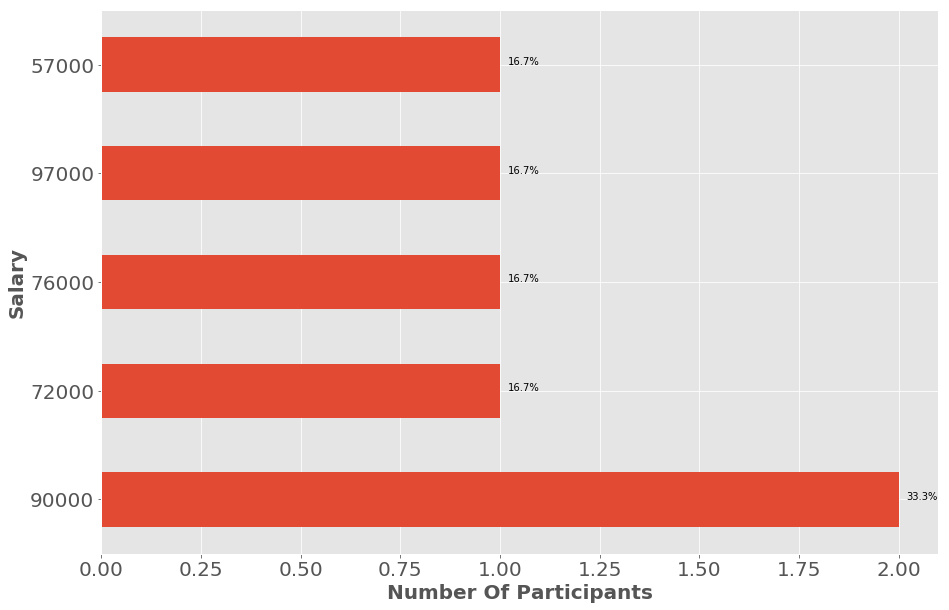

<IPython.core.display.Javascript object>

In [39]:
make_graph(df, "Salary")

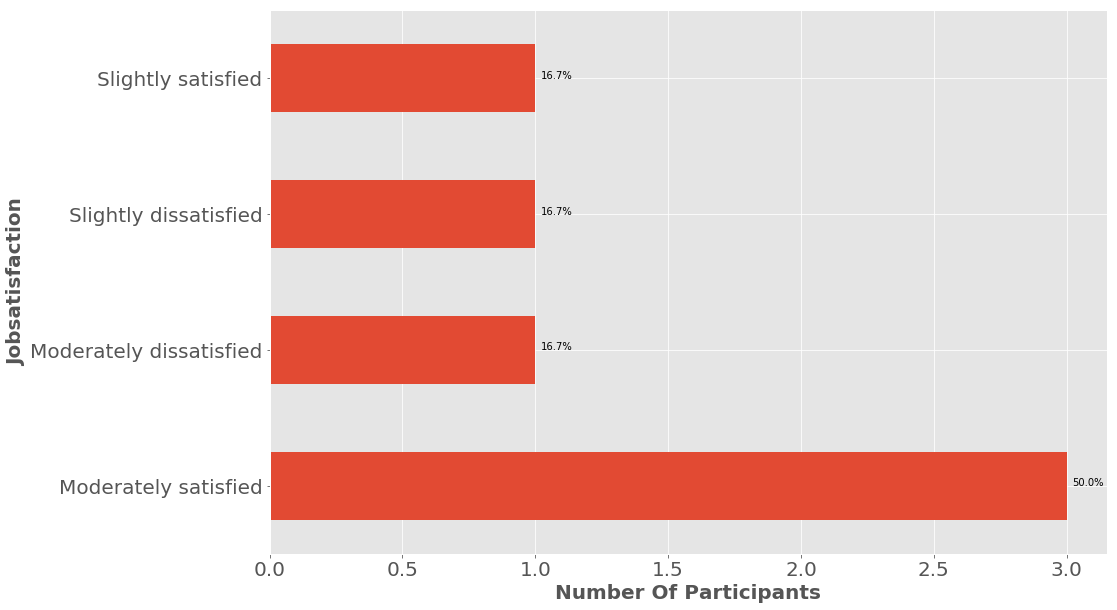

<IPython.core.display.Javascript object>

In [40]:
make_graph(df, "JobSatisfaction")

### Career Satisfaction Summary:#

In general, developers are more dissatisfied with thier job than their career. 


# Building Linear Regression Model to Predict Next Year's Most Popular Programming Language. #

We will build a LR model using data from all years (2011-2019) to predict the most common language of 2019. We will first have to extract the columns in each dataset that reflect the most common language used for that year. We will create a new dataset called lang_df that consists of all of those columns. We will clean that dataset, again we will use the split_column_value function to make sure the format of our values is how we want it to be. Once we have our data in the format we want we can proceed with the linear regression model.

In [85]:
# 2019_data:
next_year = pd.read_csv("StackOverflow_Datasets/survey_results_public_2019.csv")

<IPython.core.display.Javascript object>

In [86]:
year_2017 = pd.read_csv("StackOverflow_Datasets/survey_results_public_2017.csv")

<IPython.core.display.Javascript object>

In [87]:
year_2016 = pd.read_csv(
    "StackOverflow_Datasets/2016 Stack Overflow Survey Responses.csv"
)

<IPython.core.display.Javascript object>

In [88]:
year_2015 = pd.read_csv(
    "StackOverflow_Datasets/2015 Stack Overflow Developer Survey Responses.csv"
)

C:\Users\AnxhelaCoba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>

In [89]:
year_2014 = pd.read_csv(
    "StackOverflow_Datasets/2014 Stack Overflow Survey Responses.csv"
)

<IPython.core.display.Javascript object>

In [90]:
year_2013 = pd.read_csv(
    "StackOverflow_Datasets/2013 Stack Overflow Survey Responses.csv"
)

C:\Users\AnxhelaCoba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (46,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>

In [91]:
year_2012 = pd.read_csv("StackOverflow_Datasets/2012 Stack Overflow Survey Results.csv")

<IPython.core.display.Javascript object>

In [92]:
year_2011 = pd.read_csv("StackOverflow_Datasets/2011 Stack Overflow Survey Results.csv")

<IPython.core.display.Javascript object>

In [49]:
year_2017["LanguageWorkedWith"] = year_2017["HaveWorkedLanguage"]

<IPython.core.display.Javascript object>

In [50]:
year_2016["LanguageWorkedWith"] = year_2016["tech_do"]

<IPython.core.display.Javascript object>

In [51]:
# creating 2015 lang used column:

year_2015["LanguageWorkedWith"] = year_2015[year_2015.columns[7:49]].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1
)

<IPython.core.display.Javascript object>

In [52]:
year_2014.columns.get_loc(
    "Which of the following languages or technologies have you used significantly in the past year?"
)

42

<IPython.core.display.Javascript object>

In [53]:
year_2014.columns.get_loc("Unnamed: 66")

66

<IPython.core.display.Javascript object>

In [54]:
# creating 2014 lang used column:
year_2014["LanguageWorkedWith"] = year_2014[year_2014.columns[42:66]].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1
)

<IPython.core.display.Javascript object>

In [55]:
year_2013.columns.get_loc(
    "Which of the following languages or technologies have you used significantly in the past year?"
)

56

<IPython.core.display.Javascript object>

In [56]:
year_2013.columns.get_loc("Unnamed: 80")

80

<IPython.core.display.Javascript object>

In [57]:
# creating 2013 lang used column:

year_2013["LanguageWorkedWith"] = year_2013[year_2013.columns[56:88]].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1
)

<IPython.core.display.Javascript object>

In [58]:
year_2012.columns.get_loc("Which languages are you proficient in?")

22

<IPython.core.display.Javascript object>

In [59]:
year_2012.columns.get_loc("Unnamed: 36")

36

<IPython.core.display.Javascript object>

In [60]:
# creating 2012 lang used column:

year_2012["LanguageWorkedWith"] = year_2012[year_2012.columns[22:36]].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1
)

<IPython.core.display.Javascript object>

In [61]:
year_2011.columns.get_loc("Which languages are you proficient in?")

30

<IPython.core.display.Javascript object>

In [62]:
year_2011.columns.get_loc("Unnamed: 42")

42

<IPython.core.display.Javascript object>

In [63]:
# creating 2011 lang used column:

year_2011["LanguageWorkedWith"] = year_2011[year_2011.columns[30:42]].apply(
    lambda x: ",".join(x.dropna().astype(str)), axis=1
)

<IPython.core.display.Javascript object>

In [64]:
# Now we will make a dataframe with all the columns we created above for languages worked with in that current year:

lang_df = pd.DataFrame()

lang_df["2011"] = split_column_value(year_2011, "LanguageWorkedWith", separator=",")
lang_df["2012"] = split_column_value(year_2012, "LanguageWorkedWith", separator=",")
lang_df["2013"] = split_column_value(year_2013, "LanguageWorkedWith", separator=",")
lang_df["2014"] = split_column_value(year_2014, "LanguageWorkedWith", separator=",")
lang_df["2015"] = split_column_value(year_2015, "LanguageWorkedWith", separator=",")
lang_df["2016"] = split_column_value(year_2016, "LanguageWorkedWith")
lang_df["2017"] = split_column_value(year_2017, "LanguageWorkedWith")
lang_df["2018"] = split_column_value(df, "LanguageWorkedWith")
lang_df["2019"] = split_column_value(next_year, "LanguageWorkedWith")

<IPython.core.display.Javascript object>

In [65]:
lang_df.head()

2011        2012        2013        2014  \
0 0        Java        Java           C           C   
  1  JavaScript  JavaScript         C++         C++   
  2         CSS         CSS          C#          C#   
  3         PHP         PHP        Java        Java   
  4      Python      Python  JavaScript  JavaScript   

                                   2015          2016   2017          2018  \
0 0  Desktop Operating System: write-in           iOS  Swift  CoffeeScript   
  1        Current Lang & Tech: Android   Objective-C    NaN    JavaScript   
  2        Current Lang & Tech: Arduino           NaN    NaN          Ruby   
  3      Current Lang & Tech: AngularJS           NaN    NaN           SQL   
  4              Current Lang & Tech: C           NaN    NaN          HTML   

           2019  
0 0    HTML/CSS  
  1        Java  
  2  JavaScript  
  3      Python  
  4         NaN

<IPython.core.display.Javascript object>

In [66]:
lang_df["2015"] = lang_df["2015"].str.lstrip("Current Lang & Tech:")

<IPython.core.display.Javascript object>

In [67]:
lang_df.head()

2011        2012        2013        2014  \
0 0        Java        Java           C           C   
  1  JavaScript  JavaScript         C++         C++   
  2         CSS         CSS          C#          C#   
  3         PHP         PHP        Java        Java   
  4      Python      Python  JavaScript  JavaScript   

                                   2015          2016   2017          2018  \
0 0  Desktop Operating System: write-in           iOS  Swift  CoffeeScript   
  1                             Android   Objective-C    NaN    JavaScript   
  2                             Arduino           NaN    NaN          Ruby   
  3                           AngularJS           NaN    NaN           SQL   
  4                                               NaN    NaN          HTML   

           2019  
0 0    HTML/CSS  
  1        Java  
  2  JavaScript  
  3      Python  
  4         NaN

<IPython.core.display.Javascript object>

In [68]:
# Since we want our target variable to be numerical we will create a dictionary to map each language to an integer:

lang_dic = {
    "JavaScript": 0,
    "Python": 1,
    "HTML": 2,
    "CSS": 3,
    "C#": 4,
    "SQL": 5,
    "TypeScript": 6,
    "Bash/Shell": 7,
    "C": 8,
    "C++": 9,
    "Java": 10,
    "Matlab": 11,
    "R": 12,
    "Assembly": 13,
    "CoffeeScript": 14,
    "Erlang": 15,
    "Go": 16,
    "PHP": 17,
    "VB.NET": 18,
    "Swift": 19,
    "Groovy": 20,
    "Objective-C": 21,
    "F#": 22,
    "Haskell": 23,
    "Ruby": 24,
    "Rust": 25,
    "Julia": 26,
    "VBA": 27,
    "Scala": 28,
    "Perl": 29,
    "Perl": 30,
    "Visual Basic 6": 31,
    "Kotlin": 32,
    "Hack": 33,
    "Lua": 34,
    "Clojure": 35,
    "Delphi/Object Pascal": 36,
    "Cobol": 37,
    "Ocaml": 38,
}


lang_df["Predict_for_2019"] = lang_df["2019"].map(lang_dic)
lang_df["2018"] = lang_df["2018"].map(lang_dic)
lang_df["2017"] = lang_df["2017"].map(lang_dic)
lang_df["2016"] = lang_df["2016"].map(lang_dic)

<IPython.core.display.Javascript object>

In [69]:
# First we need to convert categroical variables to dummie variables. Isolate the categorical variables:


lang_df = lang_df.dropna(subset=["Predict_for_2019"], axis=0)
y = lang_df["Predict_for_2019"]

lang_df = lang_df.drop(["Predict_for_2019"], axis=1)

df_num = lang_df.select_dtypes(include=["float", "int"]).columns
for col in df_num:
    lang_df[col].fillna((lang_df[col].mean()), inplace=True)

df_cat = lang_df.select_dtypes(include=["object"]).columns
for cat in df_cat:
    lang_df = pd.concat(
        [
            lang_df.drop(cat, axis=1),
            pd.get_dummies(lang_df[cat], prefix=cat, prefix_sep="_", drop_first=True),
        ],
        axis=1,
    )


X = lang_df

<IPython.core.display.Javascript object>

In [70]:
lang_df.head()

2016      2017  2018  2011_C  2011_C#  2011_C++  2011_CSS  \
0 1   7.114555   7.60972   0.0       0        0         0         0   
  2   7.114555   7.60972  24.0       0        0         0         1   
  3   7.114555   7.60972   5.0       0        0         0         0   
1 0   7.114555   0.00000   4.0       0        0         0         0   
3 0  17.000000  11.00000   0.0       0        0         0         0   

     2011_Java  2011_JavaScript  2011_None  ...  2019_PHP  2019_Python  \
0 1          0                1          0  ...         0            0   
  2          0                0          0  ...         0            0   
  3          0                0          0  ...         0            1   
1 0          0                1          0  ...         0            0   
3 0          1                0          0  ...         0            0   

     2019_R  2019_Ruby  2019_Rust  2019_SQL  2019_Scala  2019_Swift  \
0 1       0          0          0         0           0           0   
  2       0          0          0         0           0           0   
  3       0          0          0         0           0           0   
1 0       0          0          0         0           0           0   
3 0       0          0          0         0           0           0   

     2019_TypeScript  2019_VBA  
0 1                0         0  
  2                0         0  
  3                0         0  
1 0                0         0  
3 0                0         0  

[5 rows x 400 columns]

<IPython.core.display.Javascript object>

In [71]:
y.unique()

array([10.,  0.,  1.,  9.,  8.,  4., 12.,  5., 17.,  6., 13., 24., 32.,
       16., 35., 21., 22., 27., 15., 28., 25., 19.])

<IPython.core.display.Javascript object>

In [72]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

<IPython.core.display.Javascript object>

In [73]:
# Create linear regression object
# regr = LinearRegression()

<IPython.core.display.Javascript object>

In [74]:
# Train the model using the training sets
# regr.fit(X_train, y_train)

# Make predictions using the testing set
# y_pred = regr.predict(X_test)

<IPython.core.display.Javascript object>

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# 7. Instantiate a LinearRegression model with normalized data
lm_model = LinearRegression(normalize=True)  # Instantiate

# 8. Fit your model to the training data
lm_model.fit(X_train, y_train)  # Fit

# Predict and score the model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

<IPython.core.display.Javascript object>

In [76]:
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

<IPython.core.display.Javascript object>

In [77]:
print("Train score is: {} ".format(train_score))
print("Test score is: {} ".format(test_score))

Train score is: 1.0 
Test score is: 0.7471898501982891 


<IPython.core.display.Javascript object>